
# Faces dataset decompositions


This example applies to `olivetti_faces` unsupervised PCA matrix decomposition (dimension reduction) method from the module `sklearn.decomposition`.

The `olivetti_faces` dataset contains 400 face pictures, where each image is represented by a row vector in data matrix (64x64 pixels = 4096 input variables). 

You have to generate a PCA decomposition of these faces:
* Generate an image of the average face for the original and the centered dataset.
* Generate images of the first six eigenvectors (i.e., “eigenfaces”).
* Generate 2D scatter plots of the corresponding PCA principal components.
* Generate the restoration of several faces using the first principal components: 10,30,50,100,200.

Finally, you are going to generate the interpolation (average) of two faces:
* Generate the image of a face interpolated in the projected PCA feature space and transformed back.
* Generate the image of a face interpolated in the projected KPCA  feature space and transformed back.


In [1]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

n_row, n_col = 2, 3
n_images = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

Load faces data


In [2]:
#Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)
print(faces.shape)

Dataset consists of 400 faces
(400, 4096)


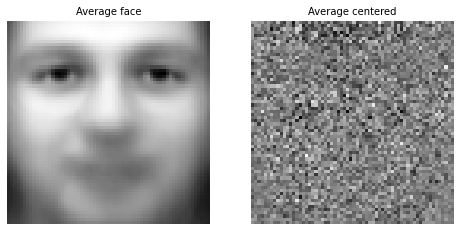

In [3]:
#Generate an image of the average face for the original and the centered dataset. 
avg_face = faces.mean(axis=0)
avg_centered = faces_centered.mean(axis=0)

# Plot 25 images randomly
fig = plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(avg_face.reshape(64, 64), cmap='gray')
plt.title("Average face", fontsize=10)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(avg_centered.reshape(64, 64), cmap='gray')
plt.title("Average centered", fontsize=10)
plt.axis('off')

plt.show()


Hemos representado la cara media (izquierda) y la cara media centrada (derecha).

In [4]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest', vmin=-vmax, vmax=vmax)
        plt.xticks(()); plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

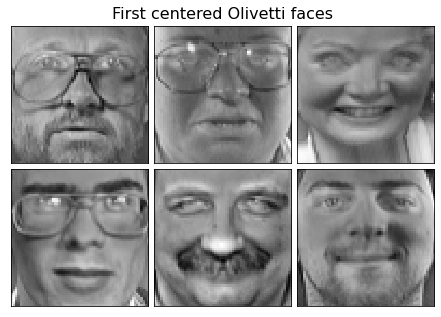

In [5]:
#Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_images])

Observamos pues las 6 primeras caras del dataset.

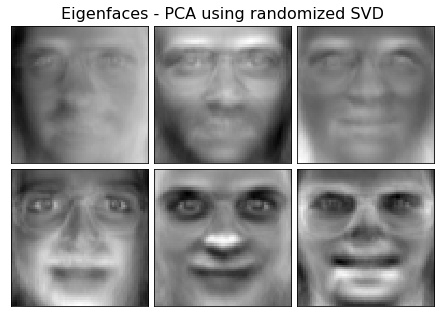

In [8]:
#Generate images of the first six eigenvectors (i.e., “eigenfaces”) 
from sklearn.decomposition import PCA
name='Eigenfaces - PCA using randomized SVD'

pca = PCA(n_components = 6, svd_solver='randomized')
pca.fit(faces_centered)
D = pca.explained_variance_
U = pca.components_
mu = pca.mean_

plot_gallery(name, U[:n_images])

Acabamos de representar las 6 primeras eigenfaces, es decir las direcciones principales.

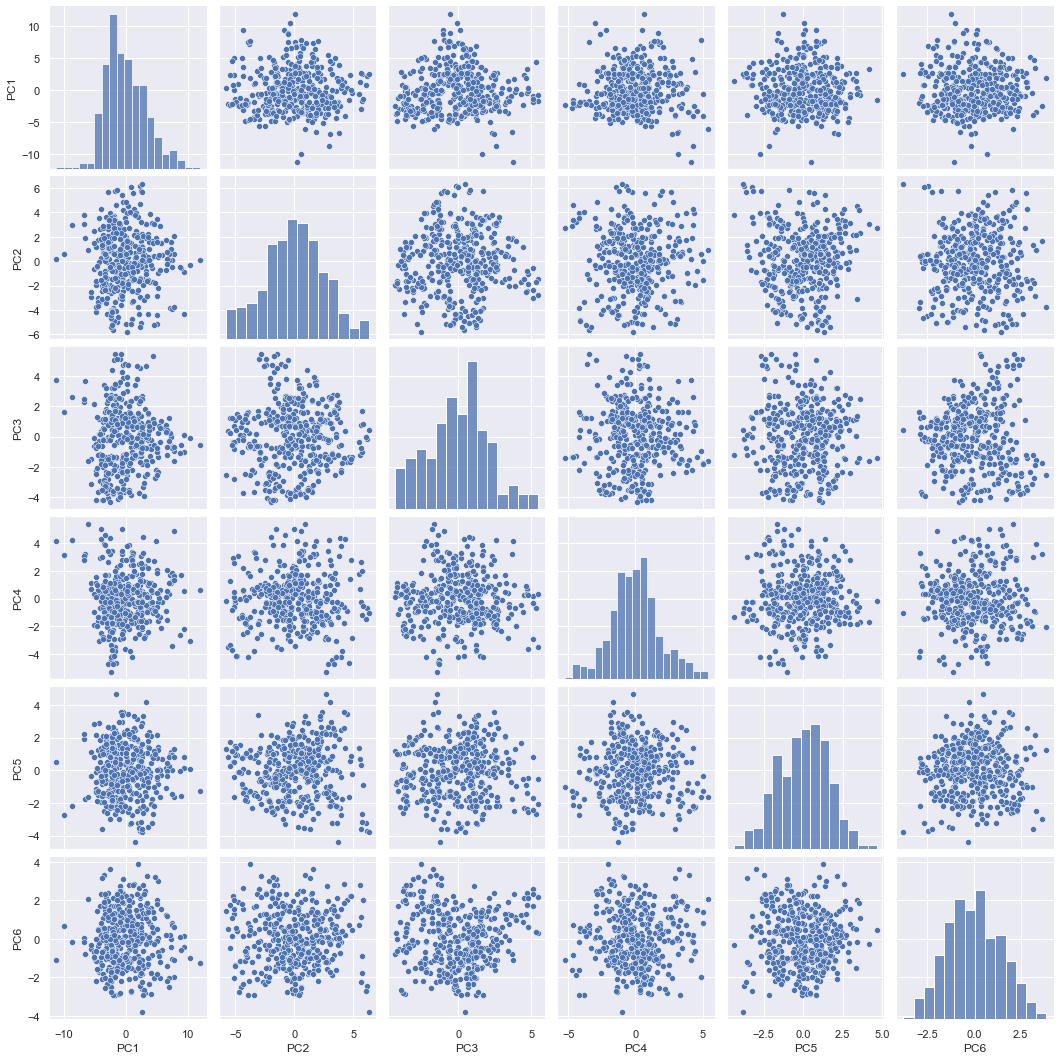

In [9]:
#Generate a 2D scatter plots of the corresponding PCA principal components 
Y = pca.transform(faces_centered)
#Pandas: python data analysis
import pandas #as pd
#Seaborn: statistical data visualization
import seaborn #as sns
seaborn.set(color_codes=True)

df = pandas.DataFrame(Y, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
seaborn.pairplot(df)

Dada esta representación no podemos ver a simple vista ninguna fuerte correlación entre las variables.

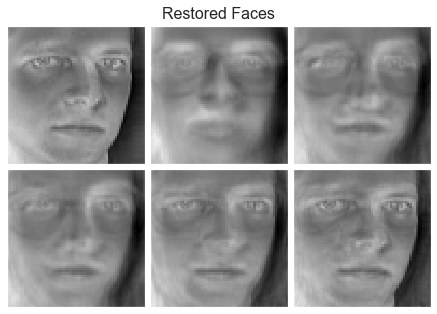

In [14]:
#Generate the restoration of several faces using the first principal component
faceidx=43
Xr=np.zeros([n_images,n_features])
Xr[0,:]=faces_centered[faceidx,:] #original
for i, nc in enumerate([10,30,50,100,200]):
    new_pca = PCA(n_components = nc, svd_solver='randomized')
    new_pca.fit(faces_centered)
    Xr[i+1,:] = new_pca.inverse_transform(new_pca.transform(Xr[0,:].reshape(1,4096)))
    
plot_gallery('Restored Faces',Xr)
plt.show()

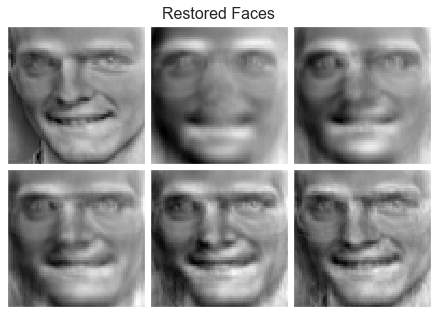

In [10]:
faceidx=59
Xr=np.zeros([n_images,n_features])
Xr[0,:]=faces_centered[faceidx,:] #original
for i, nc in enumerate([10,30,50,100,200]):
    new_pca = PCA(n_components = nc, svd_solver='randomized')
    new_pca.fit(faces_centered)
    Xr[i+1,:] = new_pca.inverse_transform(new_pca.transform(Xr[0,:].reshape(1,4096)))
    
plot_gallery('Restored Faces',Xr)
plt.show()

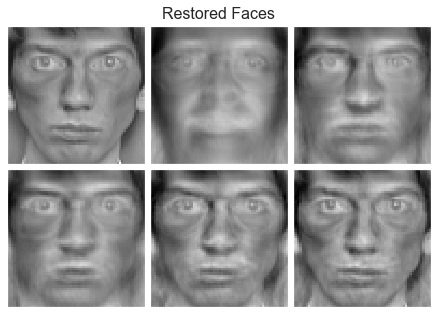

In [11]:
faceidx=104
Xr=np.zeros([n_images,n_features])
Xr[0,:]=faces_centered[faceidx,:] #original
for i, nc in enumerate([10,30,50,100,200]):
    new_pca = PCA(n_components = nc, svd_solver='randomized')
    new_pca.fit(faces_centered)
    Xr[i+1,:] = new_pca.inverse_transform(new_pca.transform(Xr[0,:].reshape(1,4096)))
    
plot_gallery('Restored Faces',Xr)
plt.show()

Observamos como a medida que aumentamos el número de componentes también aumenta el parecido con la cara original. Entre 50-100 componentes es sencillo reconocer la cara, es decir hemos conseguido un espacio de menor dimensión con la información necesaria.

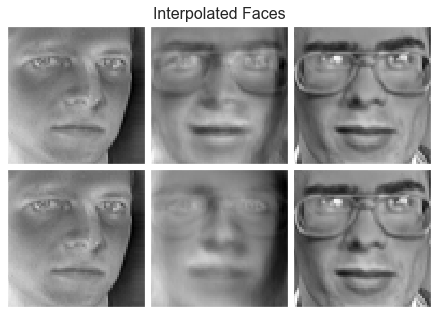

In [15]:
#Generate the interpolation (average) of two faces in the original (PCA) and the kernel space (KPCA)
from sklearn.decomposition import KernelPCA

faceidx1=43
faceidx2=3
X1=faces_centered[faceidx1,:]
X2=faces_centered[faceidx2,:]

pca = PCA(n_components = 50, svd_solver='randomized')
pca.fit(faces_centered)

X1_pca = pca.transform(X1.reshape(1,4096))
X2_pca = pca.transform(X2.reshape(1,4096))
avg_pca = (X1_pca + X2_pca)/2

kpca = KernelPCA(50,kernel='rbf',random_state=rng,fit_inverse_transform=True)
kpca.fit(faces_centered)
X1_kpca = kpca.transform(X1.reshape(1,4096))
X2_kpca = kpca.transform(X2.reshape(1,4096))
avg_kpca = (X1_kpca + X2_kpca)/2


Xr=np.zeros([n_images,n_features])
Xr[[0,3],:]=X1 #original
Xr[[2,5],:]=X2 #original
Xr[1,:]= pca.inverse_transform(avg_pca)  #pca interpolated
Xr[4,:]= kpca.inverse_transform(avg_kpca)  #kpca interpolated

plot_gallery('Interpolated Faces',Xr)
plt.show()

Hemos obtenido dos caras medias, la primera obtenida en el espacio de la PCA y la segunda en el de la KPCA, después realizamos la transformación inversa. Ambas caras tienen sentido pero podemos ver como la cara obtenida con PCA parece una "fusión" más natural.